In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Lasso , Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error , r2_score

In [64]:
df = pd.read_csv("Algerian_forest_fires_Clean_Data.csv")

In [65]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [66]:
df = df.drop(["day","month","year"],axis=1)

In [67]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [68]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [69]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [70]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [71]:
# independent and dependent features
x = df.drop("FWI",axis=1)
y = df["FWI"]

In [72]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [73]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [74]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [75]:
x_train.shape

(194, 11)

In [76]:
x_test.shape

(49, 11)

### Feature Selection

<Axes: >

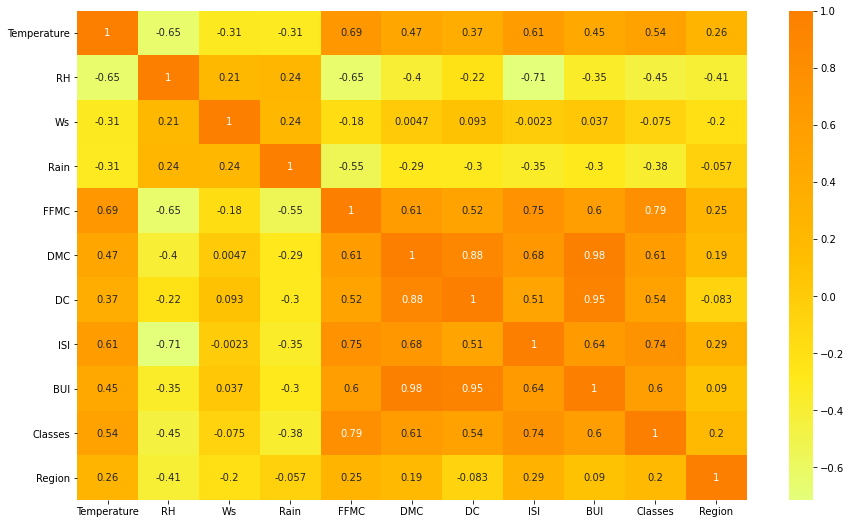

In [77]:
# checking muliti-collinerity
# multi-colinearity means independents features should not be much co-related 
plt.figure(figsize=(15,9))
corr = x_train.corr()
sns.heatmap(corr,annot=True, cmap="Wistia")

In [78]:
def correlation(dataset , threshold):
    col_corr = set()
    col_matrix = dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j]>threshold):
                colname = col_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [79]:
# threshold value always decided by the domain expert
corr_features = correlation(x_train , 0.85)

In [80]:
# drop features that are highly co releated
x_train.drop(corr_features, axis=1 , inplace=True)
x_test.drop(corr_features, axis=1 , inplace=True)

<ipython-input-80-296813e8b249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(corr_features, axis=1 , inplace=True)
<ipython-input-80-296813e8b249>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(corr_features, axis=1 , inplace=True)


In [81]:
x_train.shape , x_test.shape

((194, 9), (49, 9))

In [86]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [87]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
175,39,64,9,1.2,73.8,11.7,1.1,0,1
215,28,75,16,0.0,82.2,4.4,3.3,1,1
150,37,36,13,0.6,86.2,17.9,4.8,1,1
9,28,79,12,0.0,73.2,9.5,1.3,0,0
113,31,50,19,0.6,77.8,10.6,2.4,0,0


### Feature Scaling

In [88]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [89]:
x_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

In [90]:
x_test_scaled

array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
        -0.07699537,  0.17532762,  0.8738629 , -1.01036297],
       [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
        -0.40637763,  0.33729694,  0.8738629 , -1.01036297],
       [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
        -0.91960114, -0.86590375, -1.14434427,  0.98974332],
       [ 0.49652155, -0.25379858, -0.99568804, -0.2841268 ,  0.09950881,
         0.26770699, -0.65765748, -1.14434427,  0.98974332],
       [-0.60120131,  0.21321832, -0.61544497, -0.38015572,  0.51840466,
         0.06088557, -0.10233408,  0.8738629 ,  0.98974332],
       [ 1.86867512,  0.14650162, -2.51666033,  0.1960178 , -0.30518719,
        -0.26849668, -0.88904223, -1.14434427,  0.98974332],
       [-1.15006273,  0.8803853 ,  0.14504117, -0.38015572,  0.29120691,
        -0.82768051, -0.37999578,  0.8738629 ,  0.98974332],
       [ 1.31981369, -1.72156595, -0.99568804, -0.09206896,  0

### Visualtizing the x_train_scaled data

<Axes: >

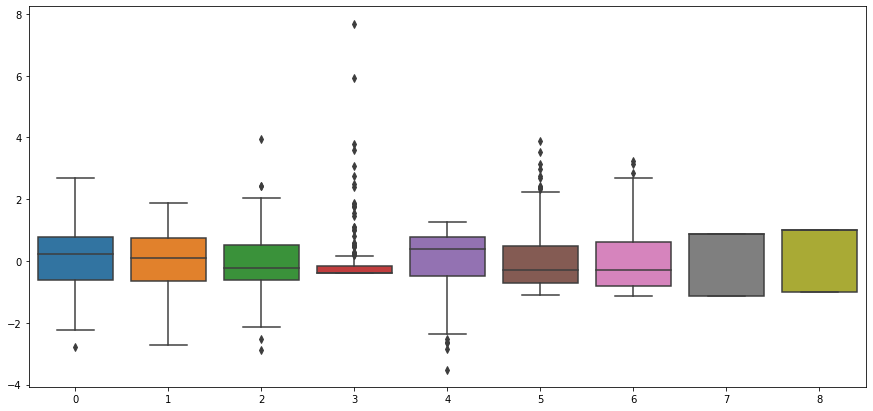

In [102]:
plt.figure(figsize=(15,7))
sns.boxplot(data =x_train_scaled)

### Linear Regression

In [105]:
linear = LinearRegression()
linear.fit(x_train_scaled,y_train)

LinearRegression()

In [111]:
y_pred = linear.predict(x_test_scaled)

In [112]:
mae = mean_absolute_error(y_pred , y_test)

In [113]:
score = r2_score(y_pred , y_test)

In [114]:
print(mae , score)

0.5049978694165663 0.9798989161128818


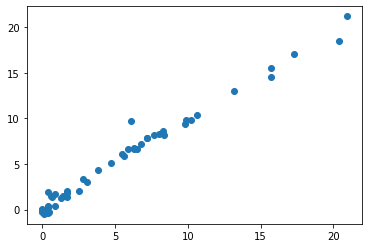

In [115]:
plt.scatter(y_test , y_pred)

### Lasso

In [116]:
lasso = Lasso()
lasso.fit(x_train_scaled , y_train)

Lasso()

In [117]:
lasso_pred = lasso.predict(x_test_scaled)

In [120]:
lasso_mae = mean_absolute_error(lasso_pred,y_test)

In [121]:
lasso_score = r2_score(lasso_pred,y_test)

In [123]:
print("Mean Absolute Error", lasso_mae)
print("Score", lasso_score)

Mean Absolute Error 1.0093958923873407
Score 0.9223897215555453


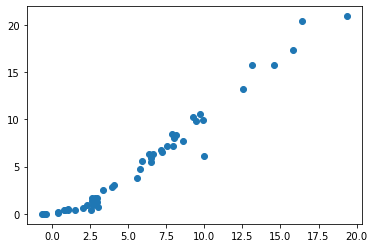

In [124]:
plt.scatter(lasso_pred,y_test)

### Ridge

In [125]:
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)

Ridge()

In [126]:
ridge_pred = ridge.predict(x_test_scaled)

In [127]:
ridge_mae = mean_absolute_error(ridge_pred,y_test)

In [128]:
ridge_score = r2_score(ridge_pred,y_test)

In [129]:
print("Mean Absolute Error", ridge_mae)
print("Score", ridge_score)

Mean Absolute Error 0.5192048325844728
Score 0.9793481599578648


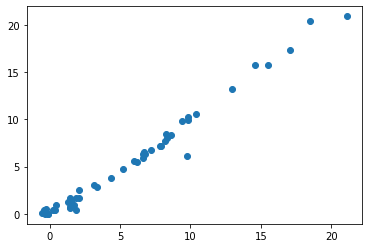

In [130]:
plt.scatter(ridge_pred,y_test)

### ElasticNet

In [132]:
el = ElasticNet()
el.fit(x_train_scaled , y_train)

ElasticNet()

In [133]:
el_pred = el.predict(x_test_scaled)

In [134]:
el_mae = mean_absolute_error(el_pred , y_test)
score_el = r2_score(el_pred , y_test)

In [135]:
print("Mean Absolute Error", ridge_mae)
print("Score", ridge_score)

Mean Absolute Error 0.5192048325844728
Score 0.9793481599578648


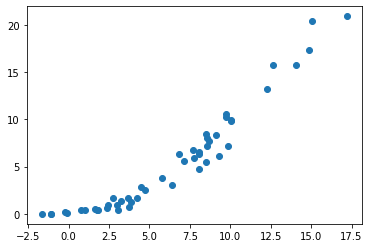

In [136]:
plt.scatter(el_pred,y_test)

## Cross Validation